## Project Part 5

Tony Nguyen

CPSC 222 01

11/08/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading
For this assignment's project, I choose to work with my Spotify data, which is in JSON format. Therefore, I will import them to a Pandas DataFrame, perform cleaning, and export to a .csv file

Among the files Spotify provided, I chose to work with `StreamHistory0.json` because of the number of instances recorded. This table contains information on the streaming history of my account, just like the name of it, for one year, from September 21, 2021, to September 21, 2022.

Here are the list of attributes in this file:
* `endTime`: the timestamp of when the song stopped playing in UTC format
* `artistName`: Name of artist of perform the song
* `trackName`: Name of the song
* `msPlayed`: How long the song was played in milisecond

In [8]:
data = pd.read_json("StreamingHistory0.json")
data

,endTime,artistName,trackName,msPlayed
0,2021-09-10 06:28,Olivia Rodrigo,"jealousy, jealousy",117418
1,2021-09-10 06:31,Jeremy Zucker,this is how you fall in love,174586
2,2021-09-10 06:35,BANNERS,Someone To You - Acoustic,214906
3,2021-09-10 06:39,Birdy,Deep End,208840
4,2021-09-10 06:42,sadeyes,you deserve better,141927
...,...,...,...,...
9222,2022-09-10 05:21,Hoàng Dũng,Ném Câu Yêu Vào Không Trung,14186
9223,2022-09-10 05:22,Taylor Swift,I Bet You Think About Me (feat. Chris Stapleto...,704
9224,2022-09-10 05:22,Suni Hạ Linh,có hẹn với thanh xuân,2538
9225,2022-09-10 05:30,MONSTAR,có hẹn với thanh xuân,554


### Data Cleaning
With the provided dataset, I want to investigate how much time *in total* I have played **Taylor Swift**'s song throughout the year. So, I filter the dataset by `artistName` and then perform *Split-Apply-Combine* method to calculate the total playtime.

Besides, since the number of instances will be too large if I decide to do data visualization, I will limit size down to 10 instances. Below is the attribute of the dataset after being filtered and sorted descending:
* `trackName`: Name of the song, also index of the data
* `msPlayed`: Time played in miliseconds

In [70]:
x1 = data[data.artistName == "Taylor Swift"]
x2 = x1.groupby("trackName").sum().sort_values("msPlayed", ascending=False).iloc[0:9]
x2.to_csv("StreamingHistory0.csv")
x2

,msPlayed
trackName,
All Too Well (10 Minute Version) (Taylor's Version) (From The Vault),25068233
I Bet You Think About Me (feat. Chris Stapleton) (Taylor’s Version) (From The Vault),14886988
Enchanted,11370897
Love Story (Taylor’s Version),9345037
Everything Has Changed (feat. Ed Sheeran) (Taylor’s Version),8444822
champagne problems,7195297
All Too Well (Taylor's Version),7085527
Run (feat. Ed Sheeran) (Taylor’s Version) (From The Vault),6962929
betty,3276761


### Data Visualization
I choose to graph a bar chart to illustrate my finding above, with the name of song on the x-axis and time played on the y-axis. However, it is worth noting that as the song names are exceptionally long, I tried to do color coding with the bar but I cannot get them to display as a legend. Therefore, it is why the chart looks a little uneven.

According to the chart, I streamed "All Too Well" the most at more than 25,000,000 milisecond, which is more than 417 minutes! I find this result sound since this is a 10-minute version of the song that Taylor Swift dropped last Fall and I have been enjoying it since. 

[Pastel Colors Source](https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py)

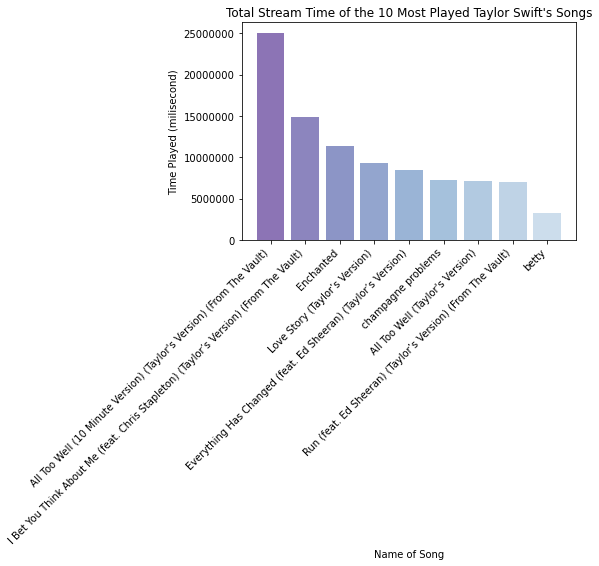

In [68]:
colors = plt.cm.BuPu(np.linspace(0.6, 0.2, len(x2)))
plt.bar(x2.index, x2["msPlayed"], color=colors)

plt.xticks(rotation=45, ha="right")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Name of Song")
plt.ylabel("Time Played (milisecond)")
plt.title("Total Stream Time of the 10 Most Played Taylor Swift's Songs")

plt.show()